# Ultimate data science challenge

In [41]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings # For handling error messages.
warnings.simplefilter(action="ignore")

# Part 1 - Exploratory Data Analysis

In [2]:
df=pd.read_json("logins.json")
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.shape

(93142, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
df.set_index('login_time', inplace=True)
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [7]:
df['count']=1

In [8]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [9]:
agg_15m = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum)

In [10]:
agg_15m

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


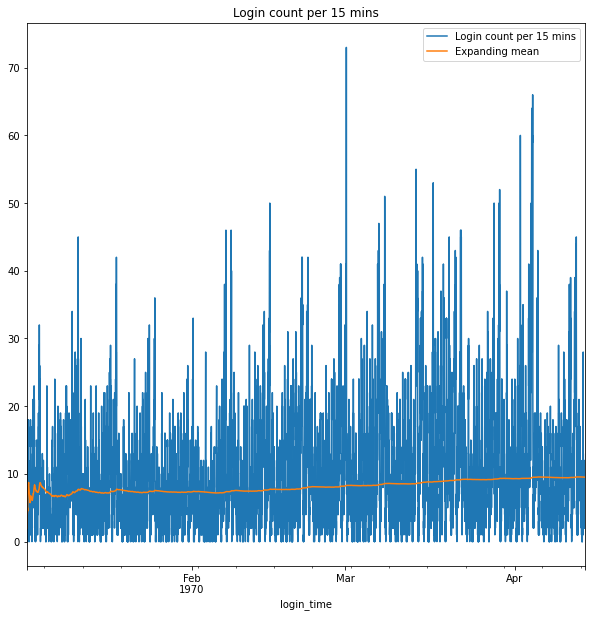

In [11]:
#plt.figure(figsize=(10,10))
#agg_15m['count'].plot()
#plt.title("Login count per 15 mins")

fig,ax = plt.subplots()
ax = agg_15m['count'].plot(figsize=(10,10), label = 'Login count per 15 mins')
ax = agg_15m['count'].expanding().mean().plot(label = 'Expanding mean')
plt.title("Login count per 15 mins")
ax.legend()

In [12]:
df_hourly = agg_15m.resample('60min').sum()
df_hourly.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


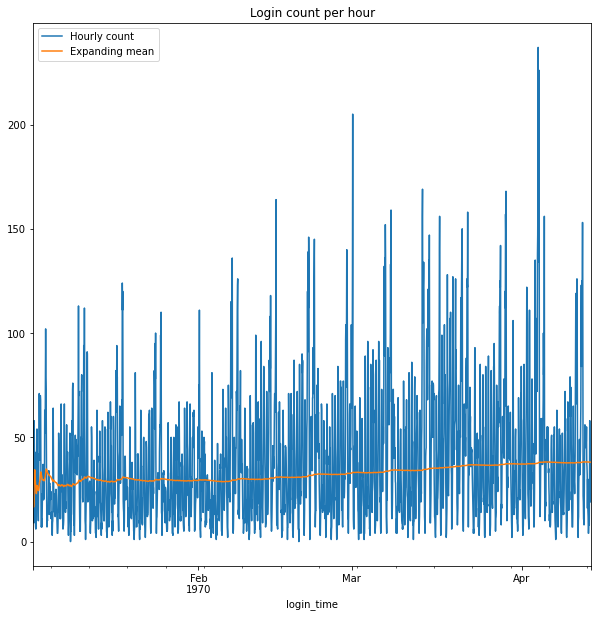

In [13]:
#df_hourly['count'].plot(figsize=(10,10))
#plt.title("Login count per hour")

fig,ax = plt.subplots()
ax = df_hourly['count'].plot(figsize=(10,10), label = 'Hourly count')
ax = df_hourly['count'].expanding().mean().plot(label = 'Expanding mean')
plt.title("Login count per hour")
ax.legend()

In [14]:
df_daily = agg_15m.resample('D').sum()
df_daily.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


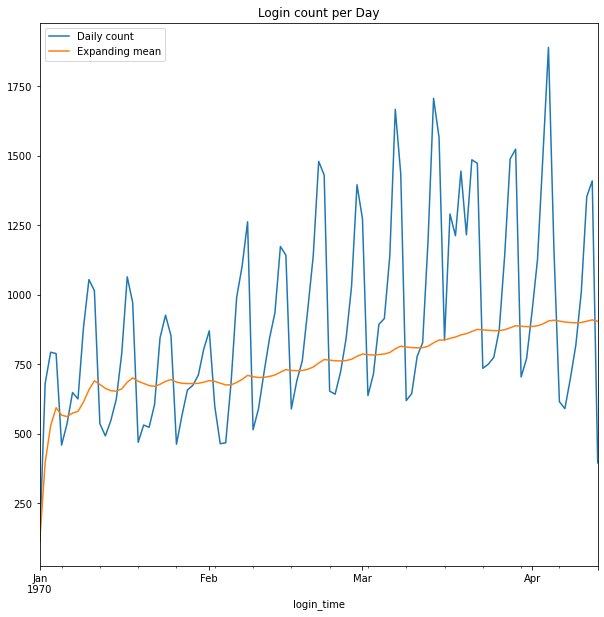

In [15]:
#df_daily['count'].plot(figsize=(10,10))
#plt.title("Login count per Day")

fig,ax = plt.subplots()
ax = df_daily['count'].plot(figsize=(10,10), label = 'Daily count')
ax = df_daily['count'].expanding().mean().plot(label = 'Expanding mean')
plt.title("Login count per Day")
ax.legend()

In [16]:
df_daily['1970-03-15':'1970-04-01']

,count
login_time,
1970-03-15,1565
1970-03-16,837
1970-03-17,1290
1970-03-18,1212
1970-03-19,1444
1970-03-20,1215
1970-03-21,1485
1970-03-22,1472
1970-03-23,735


In [17]:
df_daily['1970-04-01':]

,count
login_time,
1970-04-01,939
1970-04-02,1127
1970-04-03,1504
1970-04-04,1889
1970-04-05,1162
1970-04-06,615
1970-04-07,590
1970-04-08,698
1970-04-09,818


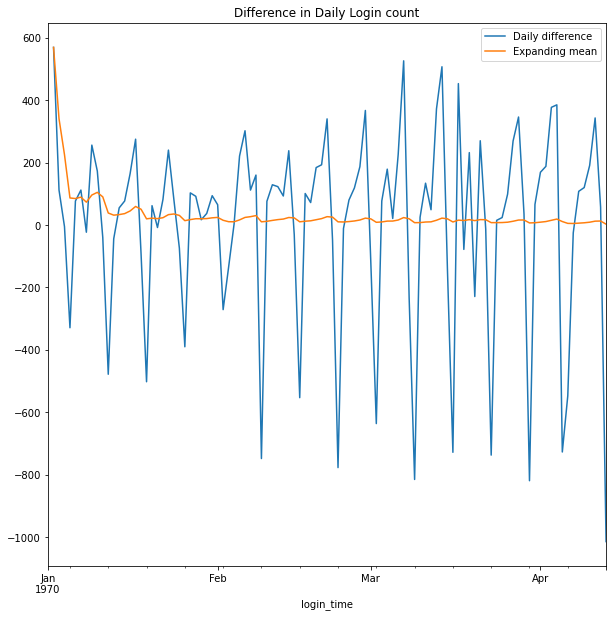

In [18]:
fig,ax = plt.subplots()
ax = df_daily['count'].diff().plot(figsize=(10,10), label = 'Daily difference')
ax = df_daily['count'].diff().expanding().mean().plot(label = 'Expanding mean')
plt.title("Difference in Daily Login count")
ax.legend()

C:\Users\Umesh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


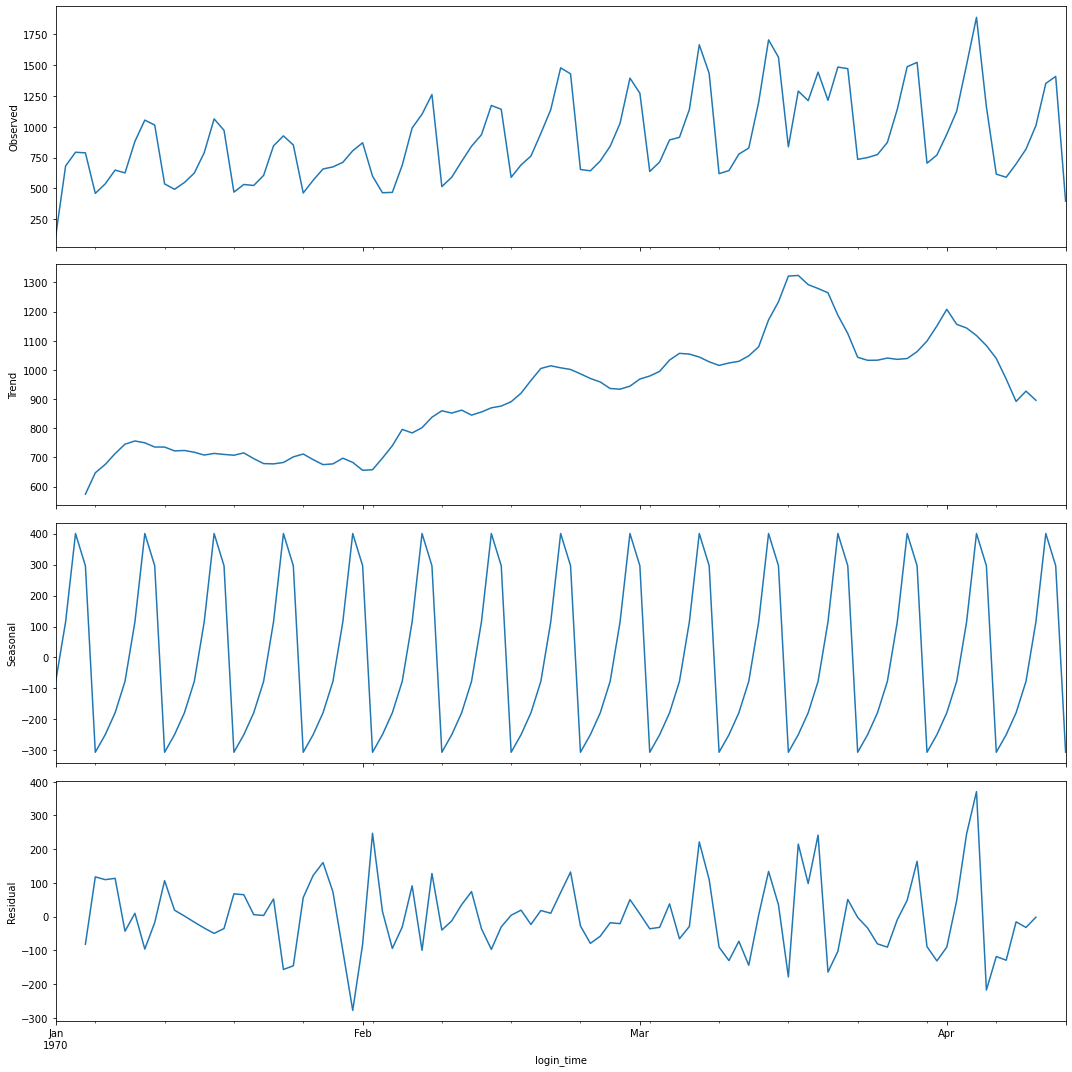

In [19]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 15, 15
decomposition = sm.tsa.seasonal_decompose(df_daily['count'], model='Multiplicative')
fig = decomposition.plot()
plt.show()

# Observations

1.  The daily demand is rising from January '70 through April '70.
2.  There is a lot of fluctuation in demand in second half of March '70.
3.  The daily difference in login counts stays the same through the given time period.
4.  The daily trend changes after April 7, '70.

# Part 2 - Experiment and metrics design

Experiment:

The experiment will be run for 3 months.

I would divide the drivers into two groups.  Group 1 is drivers that are in the experiment.  Group 2 is the rest of the drivers that are not in the experiment.

The drivers will log the following for each ride:  login time, pickup city, Toll paid or not, In experiment or not.

Once the data is collected, 
1.  Figure out driver presence in both cities for both groups.  
2.  Analyze number of rides for 15 mins / hourly / daily / monthly by City / Group. 

The key measure will be number of rides by City by Group.  

Null hypothesis will be 'The proposal increases number of rides in Group1 in comparison to Group2.'  
	
Statistical test - Perform z test on number of rides for both groups in each city.  

Result interpretation - If p value is > 0.05, the Null hypothesis is accepted.

Recommendations to the city operations team with any caveats - 
1.  Run the experiment for 3 months.
2.  Create two groups of driver partners - one group in the reimbursement plan and the other not in the plan.
3.  Have driver partners log the pickup city, Toll paid or not, In experiment or not in addition to login time.
4.  Collect data and analyze as mentioned above.
Note:  The assumption made here is the increase in rides results in increase of revenue even after toll reimbursement.

# Part 3 - Predictive Modeling

In [20]:
df_riders = pd.read_json("ultimate_data_challenge.json")
df_riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
df_riders.shape

(50000, 12)

In [22]:
df_riders.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [23]:
df_riders['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [24]:
df_riders['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [25]:
df_riders['avg_surge'].describe()

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [26]:
df_riders['surge_pct'].describe()

count    50000.000000
mean         8.849536
std         19.958811
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

In [27]:
df_riders['last_trip_date'].min()

'2014-01-01'

In [28]:
df_riders['last_trip_date'].max()

'2014-07-01'

In [29]:
df_retained_users = df_riders[df_riders['last_trip_date'] >= '2014-06-01']

In [30]:
df_retained_users.shape

(18804, 12)

# Fraction of observed users that were retained


In [31]:
18804 / 50000

0.37608

## 37.608 % of the observed users were retained

# Predictive model to determine whether or not a user will be active in their first 6 months in the system

In [32]:
df_riders.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [33]:
# Features of interest for creating a model.
df_select = df_riders[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']]

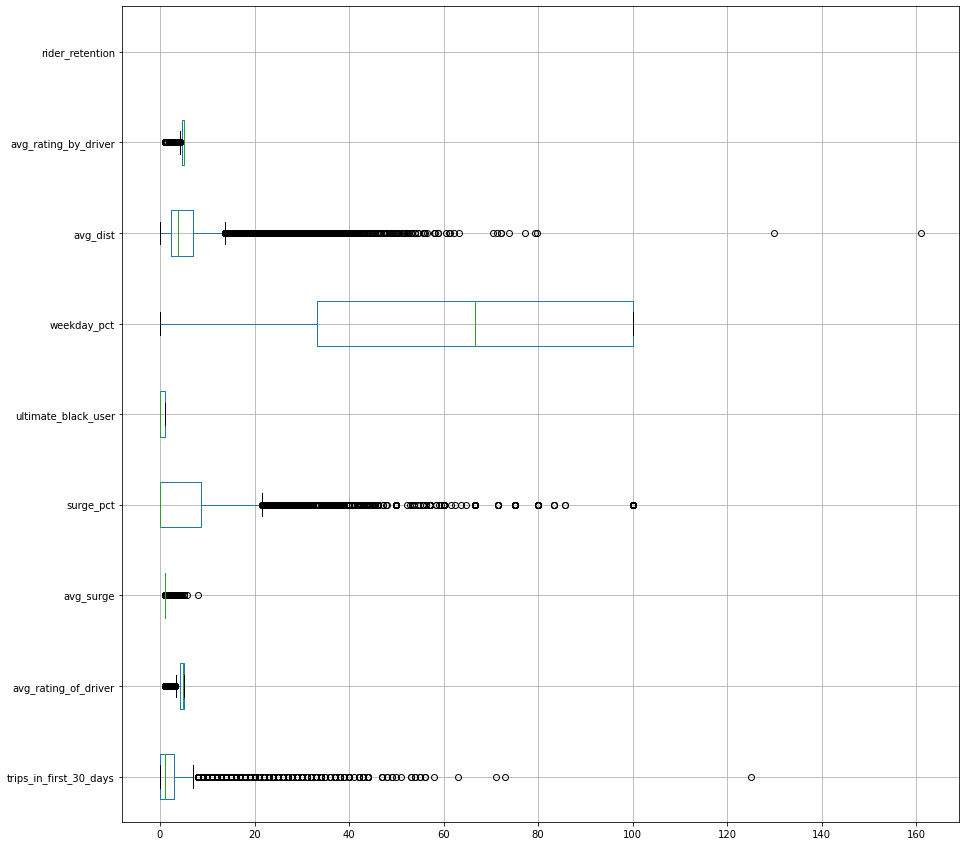

In [43]:
df_select.boxplot(vert=False, figsize=(15,15))

In [47]:
# If trips_in_first_30_days > 0, then rider_retention = 1, else 0
df_select['rider_retention'] = df_select['trips_in_first_30_days'] > 0
df_select.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,rider_retention
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,True
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,True


# 'rider_retention' is the response variable.

## Handle missing values

In [48]:
df_select.isnull().sum()

trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
rider_retention              0
dtype: int64

In [49]:
df_select["avg_rating_of_driver"].fillna(df_select["avg_rating_of_driver"].mean(), inplace=True)
df_select["avg_rating_by_driver"].fillna(df_select["avg_rating_by_driver"].mean(), inplace=True)

In [50]:
df_select.isnull().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
rider_retention           0
dtype: int64

In [54]:
df_select.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [53]:
# Check correlation of data
corr = df_select.corr()
plt.figure(figsize=(10,10))
corr.round(2).style.background_gradient(cmap='coolwarm')

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,rider_retention
trips_in_first_30_days,1.000000,-0.010000,-0.000000,0.010000,0.110000,0.050000,-0.140000,-0.040000,0.400000
avg_rating_of_driver,-0.010000,1.000000,-0.020000,-0.000000,-0.000000,0.010000,0.030000,0.100000,-0.030000
avg_surge,-0.000000,-0.020000,1.000000,0.790000,-0.080000,-0.110000,-0.080000,0.010000,0.010000
surge_pct,0.010000,-0.000000,0.790000,1.000000,-0.110000,-0.140000,-0.100000,0.020000,0.010000
ultimate_black_user,0.110000,-0.000000,-0.080000,-0.110000,1.000000,0.040000,0.030000,0.010000,0.040000
weekday_pct,0.050000,0.010000,-0.110000,-0.140000,0.040000,1.000000,0.100000,0.020000,-0.010000
avg_dist,-0.140000,0.030000,-0.080000,-0.100000,0.030000,0.100000,1.000000,0.080000,-0.070000
avg_rating_by_driver,-0.040000,0.100000,0.010000,0.020000,0.010000,0.020000,0.080000,1.000000,-0.020000
rider_retention,0.400000,-0.030000,0.010000,0.010000,0.040000,-0.010000,-0.070000,-0.020000,1.000000


<Figure size 720x720 with 0 Axes>

In [55]:
df_select.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'rider_retention'],
      dtype='object')

In [56]:
# Removing surge_pct, since avg_surge and surge_pct are highly correlated.
df_select = df_select[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'rider_retention']]

In [57]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   ultimate_black_user     50000 non-null  bool   
 4   weekday_pct             50000 non-null  float64
 5   avg_dist                50000 non-null  float64
 6   avg_rating_by_driver    50000 non-null  float64
 7   rider_retention         50000 non-null  bool   
dtypes: bool(2), float64(5), int64(1)
memory usage: 2.4 MB


In [35]:
# Questions

# Remove 'trips_in_first_30_days' ? (since rider_retention is derived from this)
# Do Logistic Regression?